In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Reads in all sheets in Riket / 0

## A)

In [4]:
df_english= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Engelska", skiprows= 8)
df_math= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Matematik", skiprows= 8)
df_swedish= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska", skiprows= 8)
df_swedish2= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska som andraspråk", skiprows= 8)
df_rapport= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Rapportbeskrivning och def.")

In [5]:
dfs= {
    "English": df_english,
    "Math": df_math,
    "Swedish": df_swedish,
    "Swedish2": df_swedish2,
    "Report": df_rapport
}
labels= [
    "",
    "",
    "(A-F)",
    "(A-F)",
    "(A-F)",
    "%(A-E)",
    "%(A-E)",
    "%(A-E)",
    "(Poäng)",
    "(Poäng)",
    "(Poäng)"
]
columns_copy= []

for subject in dfs:
    
    for column in dfs[subject].columns:
        dfs[subject][column] = dfs[subject][column].replace("..", 0)
        
    dfs[subject].columns= dfs[subject].columns.str.replace(" "[0:], "")
    dfs[subject]= dfs[subject].rename(columns= {"Typavhuvudman": "Huvudman"})
    columns_copy= dfs[subject].columns.tolist()
    columns_copy= [f"{col}{label}" for col, label in zip(dfs[subject].columns, labels)]
    
    dfs[subject].columns= columns_copy
    
df_english= dfs["English"]
df_math= dfs["Math"]
df_swedish= dfs["Swedish"]
df_swedish2= dfs["Swedish2"]
df_rapport= dfs["Report"]

C:\Users\milto\AppData\Local\Temp\ipykernel_12204\3462153218.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[subject][column] = dfs[subject][column].replace("..", 0)


## Collections

In [6]:
dfs= [
    df_english,
    df_math,
    df_swedish,
    df_swedish2
]
colors = {
    "RED1": "#D60C00",
    "RED2": "#780000",
    
    "YELLOW1": "#F4D000",
    
    "BLUE1": "#1400F4",
    "BLUE2": "#00204E",
    "BLUE3": "#c1e0e6",
    "BLUE4": "#11007A",
    
    "GREEN1": "#4DF400",
    "GREEN2": "#187A00",
    
    "GRAY1": "#292929",
    "GRAY2": "#cacaca",
}
trace_colors= [
    colors["BLUE4"],
    colors["RED2"],
    colors["GREEN2"]
]
subjects = [
    "English",
    "Math",
    "Swedish",
    "Swedish2"
]
total_points_persubject= [df.loc[0, "Totalt(Poäng)"]for df in dfs]

## B)

In [7]:
girls_f= round(df_math.loc[0, "Flickor(A-F)"]- df_math.loc[0, "Flickor(A-F)"]* (df_math.loc[0, "Flickor%(A-E)"]/ 100), 2)
boys_f= round(df_math.loc[0, "Pojkar(A-F)"]- df_math.loc[0, "Pojkar(A-F)"]* (df_math.loc[0, "Pojkar%(A-E)"]/ 100), 2)
grades_f= round(girls_f+ boys_f, 2)
grades_f

11622.81

## C)

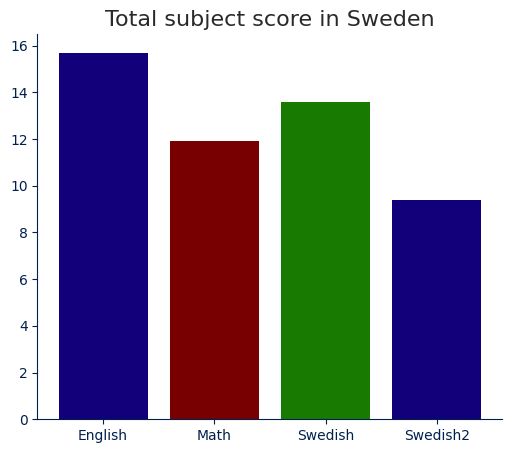

In [8]:
fig, ax= plt.subplots(figsize= (6, 5))
ax.bar(subjects, total_points_persubject, color= trace_colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.spines["left"].set_color(colors["BLUE2"])
ax.tick_params(colors= colors["BLUE2"])
ax.set_title("Total subject score in Sweden", color= colors["GRAY1"], fontsize= 16)
fig.savefig("Visualizations/plot_0.C.png")

## D)

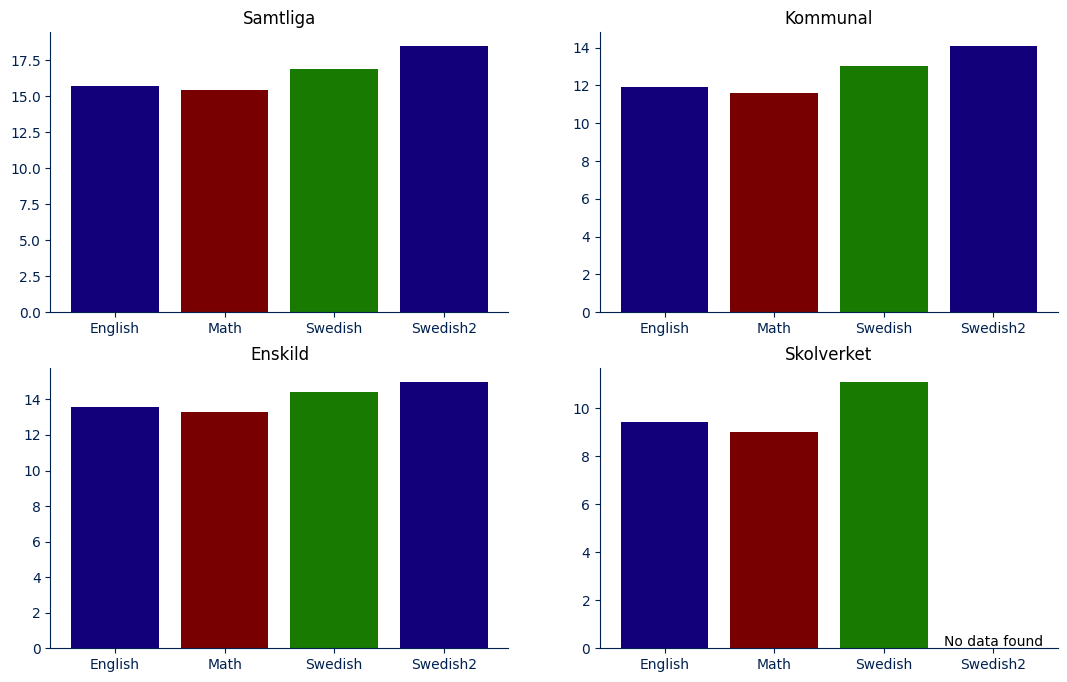

In [9]:
huvudmann= ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
fig, axs= plt.subplots(int(len(huvudmann)/2), int(len(huvudmann)/2), figsize= (13, 8))


for ax, df, huvudman in zip(axs.flatten(), dfs, huvudmann):

    ax.bar(subjects, df["Totalt(Poäng)"], color= trace_colors)
    
    for x, point in enumerate(df["Totalt(Poäng)"]):
        if point <= 0:
            ax.text(x-0.45, 0.1, "No data found")
    ax.set(title= huvudman)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(colors["BLUE2"])
    ax.spines["left"].set_color(colors["BLUE2"])
    ax.tick_params(colors= colors["BLUE2"])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
fig.savefig("Visualizations/plot_0.D.png")

# Betyg och prov / 1

## A)

In [10]:
df_1a= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1A", skiprows= 9)
df_1b= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1B", skiprows= 7)

In [11]:
df_1a.columns = [
    "Variabel",
    "Totalt",
    "Flickor",
    "Pojkar",
    "Totalt(A-F)",
    "Flickor(A-F)",
    "Pojkar(A-F)",
    "Totalt(A-E)",
    "Flickor(A-E)",
    "Pojkar(A-E)"
]
df_1b.columns= [
    "Variabel",
    "Totalt(Genomsnitt merit 16 ämnen)",
    "Flickor(Genomsnitt merit 16 ämnen)",
    "Pojkar(Genomsnitt merit 16 ämnen)",
    "Totalt(Genomsnitt merit 17 ämnen)",
    "Flickor(Genomsnitt merit 17 ämnen)",
    "Pojkar(Genomsnitt merit 17 ämnen)",
    "Totalt(% elever med minst ett F)",
    "% Flickor med minst ett F",
    "% Pojkar med minst ett F"
]

df_1a = df_1a.dropna().reset_index(drop= True)
df_1b = df_1b.dropna().reset_index(drop= True)

In [81]:
df_procentage = pd.melt(
    df_1b[0:5],
    id_vars=["Variabel"],
    var_name="Kategori",
    value_vars=[
        "Totalt(% elever med minst ett F)",
        "% Flickor med minst ett F",
        "% Pojkar med minst ett F",
    ],
    value_name="Andel F",
)

color_map = {
    "Totalt(% elever med minst ett F)": "rgba(0, 0, 0, 0.05)",
    "% Flickor med minst ett F": "rgba(0, 0, 0, 1)",
    "% Pojkar med minst ett F": "rgba(0, 0, 0, 1)",
}

fig = px.line(
    df_procentage,
    x="Variabel",
    y="Andel F",
    color="Kategori",
    line_dash="Kategori",
    markers="o",
    labels={
        "Andel F": "Andel av elever har underkänt i minst ett ämne",
        "Variabel": "Årtal",
    },
    text="Andel F",
    color_discrete_map=color_map,
)

fig.update_layout(
    title="Andel av elever som har underkänt i minst ett betyg under åren 2018-2023",
    title_x= 0.5,
    title_xanchor= "center",
    titlefont= dict(
        family= "Calibri",
        color= colors["GRAY1"],
        size= 28,
    ),
    plot_bgcolor="white",
    xaxis= dict(
        showline= True,
        linecolor= colors["GRAY2"]
    ),
    yaxis= dict(
        showline= True,
        linecolor= colors["GRAY2"]
    ),
)

fig.update_traces(
    line=dict(
        width=3,
    ),
    textposition="top center",
    textfont= dict(
        size= 15,
    ),
)

fig.update_yaxes(
    titlefont= dict(
        family= "Calibri",
        color= colors["GRAY1"],
        size= 20
    ),
    tickfont= dict(
        family= "Ariel",
        color= colors["BLUE2"],
        size= 18,
    )
)

fig.update_xaxes(
    titlefont= dict(
        family= "Calibri",
        color= colors["GRAY1"],
        size= 20
    ),
    tickfont= dict(
        family= "Ariel",
        color= colors["BLUE2"],
        size= 18,
    )
)

pio.write_html(fig, "Visualizations/plot_1.A.html")
fig.show()

## B)

In [61]:
df_mean16 = pd.melt(
    df_1b[0:5],
    id_vars="Variabel",
    var_name="Kategori",
    value_vars={
        "Totalt(Genomsnitt merit 16 ämnen)",
        "Flickor(Genomsnitt merit 16 ämnen)",
        "Pojkar(Genomsnitt merit 16 ämnen)",
    },
    value_name="Meritvärde",
)

fig = px.line(
    df_mean16,
    x="Variabel",
    y="Meritvärde",
    color="Kategori",
    labels={"Variabel": "Årtal"},
    markers=True,
    text= "Meritvärde",
)

fig.update_layout(
    title="Genomsnittligt meritvärde för pojkar, flickor och totalt utöver 16 ämnen",
    title_font=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=30,
    ),
    title_x=0.45,
    title_xanchor="center",
    title_yanchor="top",
    plot_bgcolor="white",
    yaxis= dict(
        showline= True,
        linecolor= colors["GRAY2"]
    ),
    xaxis= dict(
        showline= True,
        linecolor= colors["GRAY2"]
    ),
)

fig.update_traces(
    line=dict(
        width=2,
    ),
    textposition="top center",
    textfont= dict(
        size= 15
    ),
    
    marker=dict(
        size=8,
    ),
)

fig.update_xaxes(
    titlefont=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=23,
    ),
    tickfont=dict(
        family="Ariel",
        size=18,
        color=colors["BLUE2"],
    ),
)

fig.update_yaxes(
    titlefont=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=23,
    ),
    tickfont=dict(
        family="Ariel",
        color=colors["GRAY2"],
        size=18,
    ),
)
for i, trace in enumerate(fig.data):
    trace.line.color= trace_colors[i]


pio.write_html(fig, "Visualizations/plot_1.B.html")
fig.show()

## C)

In [47]:
df_own_variables = pd.concat([df_1b.iloc[10:12], df_1b.iloc[18:23]])
df_own_variables_melted = pd.melt(
    df_own_variables,
    id_vars="Variabel",
    var_name="Kategori",
    value_vars={
        "Totalt(Genomsnitt merit 17 ämnen)",
        "Flickor(Genomsnitt merit 17 ämnen)",
        "Pojkar(Genomsnitt merit 17 ämnen)",
    },
    value_name="Meritvärde",
    
)
fig = px.bar(
    df_own_variables_melted,
    x="Variabel",
    y="Meritvärde",
    color="Kategori",
    barmode= "group"
)
fig.update_layout(
    plot_bgcolor="white",
    title="Genomsnittliga meritvärdet baserat på 17 ämnen med olika variabler, uppdelat på totalt, pojkar och flickor",
    title_x=0.45,
    title_xanchor="center",
    titlefont=dict(
        family="Calibril",
        color=colors["GRAY1"],
        size=30,
    ),
    yaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"]
    ),
    xaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"]
    )
)
fig.update_xaxes(
    color=colors["BLUE2"],
    title= "De olika kategorierna",
    title_font=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=22,
    ),
    tickfont=dict(
        family="Ariel",
        size=18,
    ),
)
fig.update_yaxes(
    color=colors["BLUE2"],
    title_font=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=22,
    ),
    showgrid= True,
    gridcolor= colors["GRAY2"]
)

for i, trace in enumerate(fig.data):
    trace.marker.color= trace_colors[i]
    
pio.write_html(fig, "Visualizations/plot_1.C.html")
fig.show()

## 2.A)

In [15]:
df_gymnasie= pd.read_excel("../Data/Data_processing/Gymnasieskola-Jämförelse_av_betygsresultat_över_tid_2023_Län.xlsx", skiprows= 7)

In [16]:
df_graduated= df_gymnasie[(df_gymnasie["Uppgift"] == "Genomsnittlig betygspoäng") & (df_gymnasie["Typ av huvudman"] == "Kommunal")].reset_index(drop= True)

df_hs_graduate = pd.melt(
    df_graduated,
    id_vars= {"Län"},
    value_vars= {
        "2022/23",
        "2021/22",
        "2020/21",
        "2019/20",
        "2018/19",
        "2017/18",
        "2016/17",
        "2015/16",
        "2014/15",
        "2013/14",
        },
    var_name= "Årtal",
    value_name= "Betygpoäng"
)

df_hs_graduate.sort_values(by= "Årtal", ascending= True, inplace= True)
df_hs_graduate.reset_index(drop= True, inplace= True)

In [17]:
pivot_df = df_hs_graduate.pivot_table(index='Län', columns='Årtal', values='Betygpoäng')
column_years= pivot_df.columns.tolist()

diff= pivot_df[column_years[-1]] - pivot_df[column_years[0]]

In [18]:
##df_sorted_highest= df_hs_graduate.groupby("Län")["Betygpoäng"].mean().sort_values(ascending= False)
top_5_diff= diff.sort_values(ascending= False).iloc[:5]
top_5_diff

Län
Stockholms län       0.8
Östergötlands län    0.7
Kalmar län           0.7
Uppsala län          0.6
Skåne län            0.6
dtype: object

## Genomsnittliga betygpoäng för kommunal skolor i sveriges län

In [44]:
fig = px.line(
    df_hs_graduate,
    x="Årtal",
    y="Betygpoäng",
    color="Län",
    markers= True,
)
for trace in fig.data:
    if trace.name in top_5_diff:
        trace.opacity= 1
    else:
        trace.opacity= 0.04
        trace.text= None
fig.update_layout(
    title="Visar Genomsnittliga betygpoäng för kommunala skolor i Sveriges län 2013-2023",
    title_x=0.45,
    title_font=dict(
        family="Calirbi",
        size=26,
        color=colors["GRAY1"],
    ),
    plot_bgcolor= "white",
    xaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"]
    ),
    yaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"]
    ),
)
fig.update_yaxes(
    title_font=dict(
        family="Ariel",
        size=20,
        color=colors["BLUE2"],
    ),
    showgrid= True,
    gridcolor= colors["GRAY2"]
)
fig.update_xaxes(
    title_font=dict(
        family="Ariel",
        size=20,
        color=colors["BLUE2"],
    ),
    tickfont=dict(
        family="Calibi",
        color=colors["GRAY1"],
        size=15,
    ),
)
fig.update_traces(
    line= dict(
        width= 3,
    ),
    marker= dict(
        size= 10
    ),
)
fig.add_annotation(
    text= "Top 5 ökning under åren är ifyllda",
    x= 1,
    y= 15,
    showarrow= False,
    font= dict(
        family= "Calibri",
        color= colors["GRAY1"],
        size= 20
    ),
)

for i, trace in enumerate(fig.data):
    index= i % len(trace_colors)
    trace.line.color= trace_colors[index]

pio.write_html(fig, "Visualizations/plot_2.A.html")
fig.show()

## 2.B)

In [20]:
df_costs_22_raw= pd.read_excel("../Data/Data_processing/Gymnasieskola - Kostnader per län 2022 Län.xlsx", skiprows= 7)
df_students_raw= pd.read_excel("../Data/Data_processing/Gymnasieskola - Antal elever 2022 Län.xlsx", skiprows= 7)

In [21]:
df_students22_23= df_students_raw[df_students_raw["Typ av huvudman"]== "Kommunal"].drop(columns= "Läns-kod").reset_index(drop= True)
df_costs_22= df_costs_22_raw.drop(columns= "Läns-kod").reset_index(drop= True)

In [22]:
df_merged2022= pd.merge(
    df_costs_22[["Län", "Totalt per elev"]],
    df_graduated[["Län", "2022/23"]],
    on= "Län",
)

In [23]:
df_melted_merge= pd.melt(
    df_merged2022,
    id_vars= "Län",
    value_vars= ["Totalt per elev", "2022/23",],
    var_name= "Kategori",
    value_name= "Value"
)
df_melted_merge["Kategori"].replace({"2022/23": "Betygpoäng"},inplace= True)

C:\Users\milto\AppData\Local\Temp\ipykernel_12204\358418442.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [86]:
fig = make_subplots(
    specs=[[{"secondary_y": True}]]
)

#Primary
fig.add_trace(
    go.Scatter(
        x= df_melted_merge[df_melted_merge["Kategori"]== "Totalt per elev"]["Län"],
        y= df_melted_merge[df_melted_merge["Kategori"]== "Totalt per elev"]["Value"],
        name= "Totalt per elev",
        mode= "lines+markers",
        line= dict(
            dash= "solid"
        )
    ),
    secondary_y= True
)

#secondary
fig.add_trace(
    go.Scatter(
        x= df_melted_merge[df_melted_merge["Kategori"]== "Betygpoäng"]["Län"],
        y= df_melted_merge[df_melted_merge["Kategori"]== "Betygpoäng"]["Value"],
        name= "Betygspoäng",
        mode= "lines+markers",
        line= dict(
            dash= "dash",
        )
    ),
    secondary_y= False
)

fig.update_yaxes(
    secondary_y= True,
    title= "Kostnad per elev",
    
    title_font= dict(
            family="Calibri",
            size= 20
        ),
    tickfont=dict(
        family="Calibri",
        color=colors["BLUE2"],
        size=15,
    ),
)

fig.update_yaxes(
    secondary_y= False,
    title= "Genomsnittligt betygpoäng",
    title_font= dict(
            family="Calibri",
            size= 20
        ),
    
    range= [13.45, 16],
    tickfont= dict(
        family= "Calibri",
        size= 15,
        color= colors["BLUE2"]
    ),
    showgrid= True,
    gridcolor= colors["GRAY2"]
)

fig.update_xaxes(
    tickfont= dict(
        family= "Calibri",
        size= 15,
        color= colors["BLUE2"]
    )
)

fig.update_traces(
    line= dict(
        width= 3
    ),
    marker= dict(
        size= 10
    )
)

fig.update_layout(
    plot_bgcolor= "white",
    title= "Jämnsförelse i sveriges län, med genomsnittliga betyg och hur mycket pengar som spenderas per elev år 2022-2023",
    title_x= 0.45,
    title_font= dict(
        family= "Ariel",
        size= 25,
    ),
    
    xaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"],
    ),
    yaxis= dict(
        showline= True,
        linecolor= colors["GRAY1"],
    )
)

for i, trace in enumerate(fig.data):
    index= i % len(trace_colors)
    trace.line.color= trace_colors[index]

pio.write_html(fig, "../Laboration2/Visualizations/plot_2.B.html")
fig.show()

## 2.C

In [25]:
df_short_long= df_1b[(df_1b["Variabel"]== "Kort utbildning") | (df_1b["Variabel"]== "Lång utbildning")].reset_index(drop= True)

In [39]:
short_long_melted = pd.melt(
    df_short_long,
    id_vars="Variabel",
    value_vars={
        "Totalt(Genomsnitt merit 17 ämnen)",
        "Flickor(Genomsnitt merit 17 ämnen)",
        "Pojkar(Genomsnitt merit 17 ämnen)",
    },
    var_name="Kategori",
    value_name="Meritvärde",
)

fig = px.bar(
    short_long_melted,
    x="Variabel",
    y="Meritvärde",
    color="Kategori",
    barmode="group",
    text="Meritvärde",
)
fig.update_layout(
    height= 600,
    plot_bgcolor="white",
    
    title="Skillnaden på hur elevernas betyg påverkas av föräldrarnas utbildning",
    title_x=0.5,
    title_xanchor="center",
    titlefont=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=35,
    ),
    yaxis=dict(
        showline=True,
        linecolor=colors["GRAY2"],
    ),
    xaxis=dict(
        showline=True,
        linecolor=colors["GRAY2"],
    ),
    showlegend= False
)

fig.update_xaxes(
    title= "Utbildnings nivå för föräldrar.",
    titlefont=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=27,
    ),
    tickfont=dict(
        family="Ariel",
        size=22,
    ),
)

fig.update_yaxes(
    titlefont=dict(
        family="Calibri",
        color=colors["GRAY1"],
        size=27,
    ),
    tickfont=dict(
        family="Ariel",
        color=colors["GRAY2"],
        size=22,
    ),
)

fig.update_traces(
    textposition="outside",
    textfont=dict(
        size=15,
    ),
)

fig.add_annotation(
    text= "Flickor",
    xref="paper",  
    yref="paper",
    
    arrowhead= 2,
    arrowcolor= colors["RED2"],
    
    x= 0.7,
    y= -0.02,
    ax= -50,
    ay= 50,
    
    font=dict(
        size= 20,
        color= colors["RED2"]
    ),
)
fig.add_annotation(
    text= "Pojkar",
    xref= "paper",
    yref= "paper",
    
    arrowhead= 2,
    arrowcolor= colors["GREEN2"],
    
    x= 0.35,
    y= -0.02,
    ax= -30,
    ay= 50,
    
    font= dict(
        size= 20,
        color= colors["GREEN2"]
    )
)

fig.add_annotation(
    text= "Totalt",
    xref= "paper",
    yref= "paper",
    arrowhead= 2,
    arrowcolor= colors["BLUE4"],
    
    x= 0.06,
    y= -0.02,
    ax= -50,
    ay= 50,
    
    font=dict(
        size= 20,
        color= colors["BLUE4"]
    )
)

for i, trace in enumerate(fig.data):
    index= i % len(trace_colors)
    trace.marker.color= trace_colors[index]

fig.show()